In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import efficientnet_b0


In [8]:
data_dir = 'D:\\EifficientNet\\data'

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.RandomHorizontalFlip(),  
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(root=data_dir + '\\train', transform=train_transforms)
val_dataset = datasets.ImageFolder(root=data_dir + '\\val', transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [3]:
model = efficientnet_b0(weights='DEFAULT') 
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 4)  # 4 lớp

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

Epoch [1/10], Loss: 0.006270443295928999
Epoch [2/10], Loss: 0.005077600618293218
Epoch [3/10], Loss: 0.003921608062835731
Epoch [4/10], Loss: 0.0007756356279187457
Epoch [5/10], Loss: 0.0011391529686243303
Epoch [6/10], Loss: 0.0015296904497581637
Epoch [7/10], Loss: 0.002361867557786127
Epoch [8/10], Loss: 0.0021349123337522542
Epoch [9/10], Loss: 0.0025008540661897315
Epoch [10/10], Loss: 0.0005995211442723303
Huấn luyện hoàn thành!


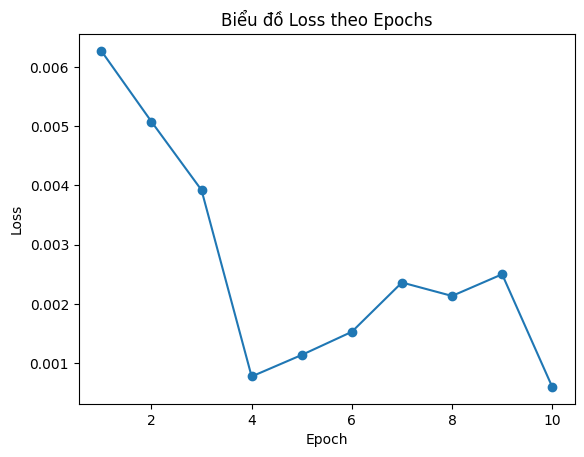

In [12]:
import matplotlib.pyplot as plt

loss_history = []

for epoch in range(10):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    loss_history.append(epoch_loss)
    print(f"Epoch [{epoch+1}/10], Loss: {epoch_loss}")

    # Lưu checkpoint
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': epoch_loss
    }
    torch.save(checkpoint, f'checkpoint_epoch_{epoch+1}.pth')

print("Huấn luyện hoàn thành!")

plt.plot(range(1, 11), loss_history, marker='o')
plt.title("Biểu đồ Loss theo Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [ ]:
checkpoint = torch.load('checkpoint_epoch_10.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.train()  # Đặt model về trạng thái training nếu tiếp tục huấn luyện


In [52]:
print(torch.__version__)
print(torchvision.__version__)

2.5.0+cpu
0.20.0+cpu
